<a href="https://www.kaggle.com/code/vanpatangan/messy-retail-data-cleaning-pipeline-eda?scriptVersionId=287225842" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import Libraries and Data

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from IPython.display import display, Markdown

import warnings
warnings.simplefilter("ignore")

In [2]:
customer = pd.read_csv('/kaggle/input/retail-fashion-data/customer_data.csv')
product = pd.read_csv('/kaggle/input/retail-fashion-data/product_data.csv')
sales = pd.read_csv('/kaggle/input/retail-fashion-data/sales_data.csv')
store = pd.read_csv('/kaggle/input/retail-fashion-data/store_data.csv')

# Data Summary

## **Customer Data**

,column,dtype,instances,unique,sum_null,duplicates
customer_id,customer_id,object,25000,25000,0,0
age,age,int64,25000,54,0,0
gender,gender,object,25000,4,0,0
city,city,object,25000,5,0,0
email,email,object,24504,24504,496,0


,customer_id,age,gender,city,email
0,C000001,61,Other,Lisbon,user1@example.com
1,C000002,61,Female,Coimbra,user2@example.com
2,C000003,22,Female,Faro,user3@example.com
3,C000004,46,Other,Lisbon,NaN
4,C000005,47,Other,Faro,user5@example.com


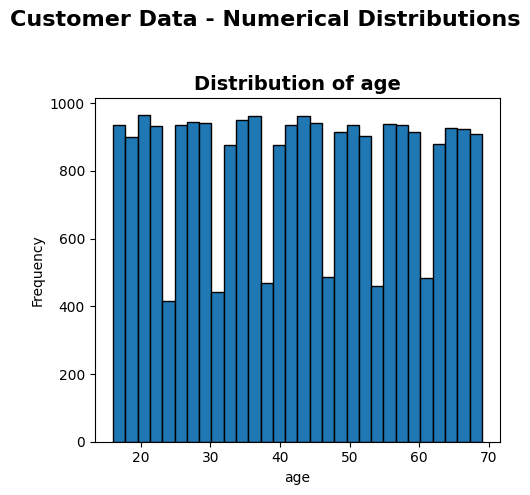

## **Product Data**

,column,dtype,instances,unique,sum_null,duplicates
product_id,product_id,object,50000,50000,0,0
category,category,object,50000,6,0,0
color,color,object,49010,6,990,0
size,size,object,50000,5,0,0
season,season,object,50000,4,0,0
supplier,supplier,object,50000,4,0,0
cost_price,cost_price,float64,50000,7490,0,0
list_price,list_price,float64,50000,17570,0,0


,product_id,category,color,size,season,supplier,cost_price,list_price
0,P000001,Bottoms,Black,XL,Spring,supplierb,78.26,46.45
1,P000002,???,Black,M,Summer,supplierc,39.67,147.82
2,P000003,Tops,Black,XL,Summer,supplierd,27.62,44.40
3,P000004,Accessories,White,XL,Winter,supplierb,7.43,68.49
4,P000005,Accessories,NaN,XL,Fall,suppliera,12.04,76.79


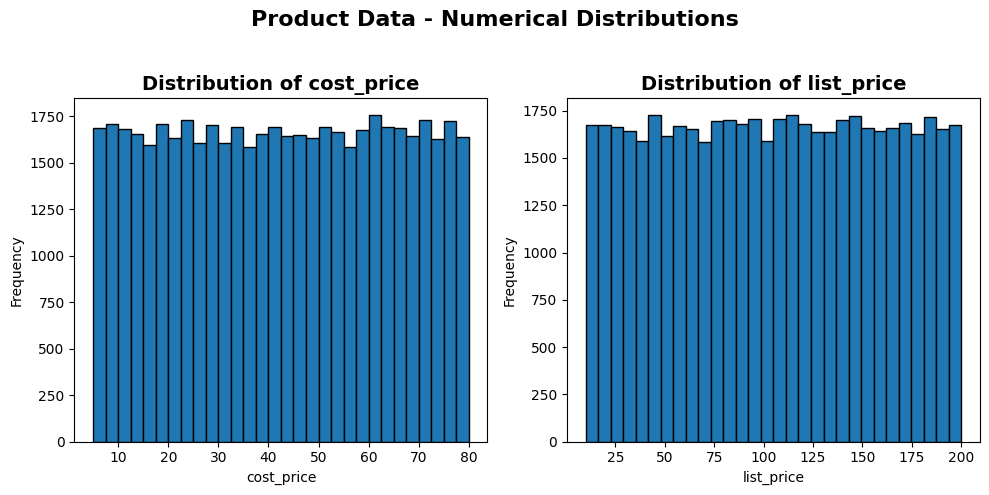

## **Sales Data**

,column,dtype,instances,unique,sum_null,duplicates
transaction_id,transaction_id,object,50000,50000,0,0
date,date,object,50000,1827,0,0
product_id,product_id,object,50000,31387,0,0
store_id,store_id,object,50000,6,0,0
customer_id,customer_id,object,48156,21275,1844,0
quantity,quantity,int64,50000,4,0,0
discount,discount,float64,47417,4,2583,0
returned,returned,int64,50000,2,0,0


,transaction_id,date,product_id,store_id,customer_id,quantity,discount,returned
0,T0000001,2023-08-02,P004681,S004,C010043,3,0.0,0
1,T0000002,2020-08-16,P006662,S003,C022472,1,0.0,0
2,T0000003,2020-02-21,P043402,S005,C016135,4,0.0,0
3,T0000004,2024-02-27,P029875,S003,C005605,3,NaN,1
4,T0000005,2021-07-17,P002476,S003,C005857,4,0.0,0


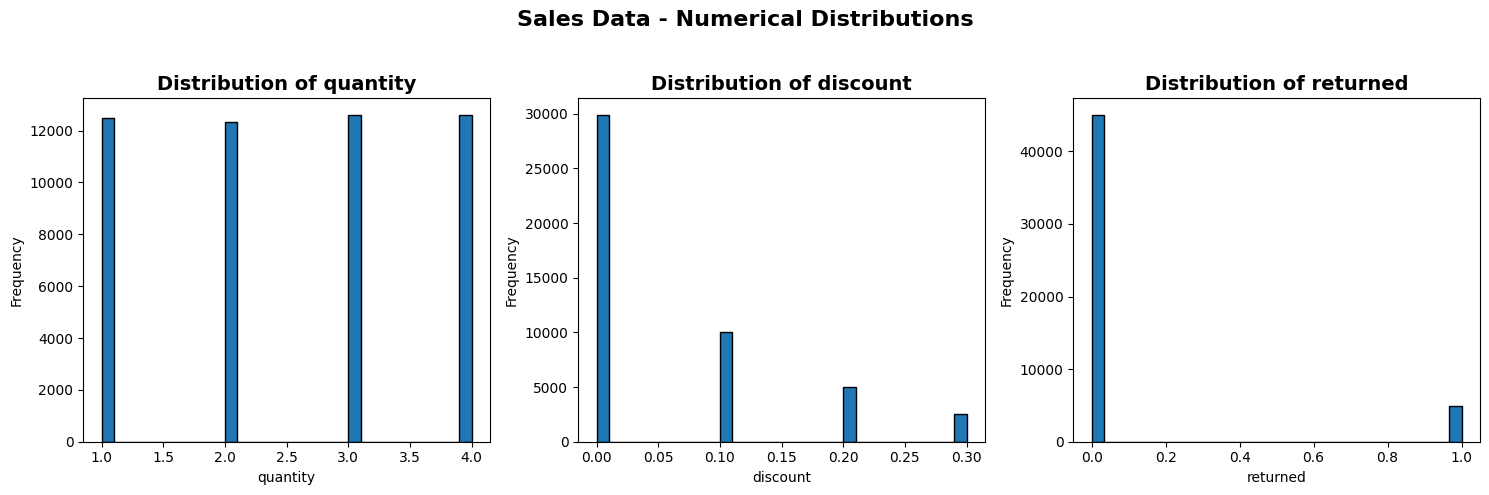

## **Store Data**

,column,dtype,instances,unique,sum_null,duplicates
store_id,store_id,object,5,5,0,0
store_name,store_name,object,5,5,0,0
region,region,object,5,5,0,0
store_size_m2,store_size_m2,int64,5,5,0,0


,store_id,store_name,region,store_size_m2
0,S001,Lisbon Flagship,Lisbon,179
1,S002,Porto Center,Porto,728
2,S003,Faro Outlet,Algarve,336
3,S004,Online,Online,950
4,S005,Coimbra Boutique,Coimbra,238


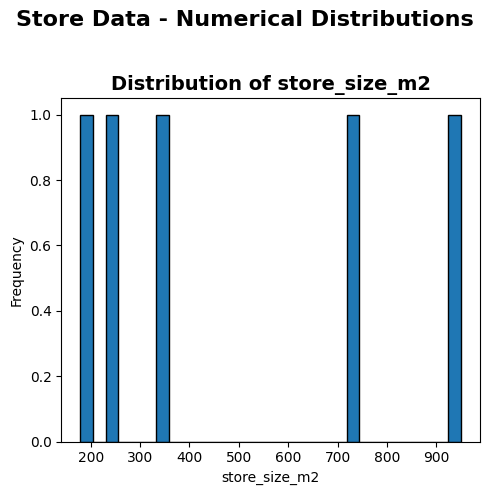

In [3]:
def check(df):
    """
    Generates a concise summary of DataFrame columns.
    """
    total_rows = len(df)
    duplicates = df.duplicated().sum()

    dtypes = df.dtypes
    instances = df.count()
    unique = df.nunique()
    sum_null = df.isnull().sum()

    df_check = pd.DataFrame({
        'column': df.columns,
        'dtype': dtypes,
        'instances': instances,
        'unique': unique,
        'sum_null': sum_null,
        'duplicates': duplicates  
    })

    return df_check

# Helper function to plot distributions
def plot_distributions(df, title):
    numeric_df = df.select_dtypes(include='number')
    if numeric_df.empty:
        display(Markdown(f"**No numerical columns to plot distributions for {title}**"))
        return
    
    cols = numeric_df.columns
    n_cols = len(cols)
    fig, axes = plt.subplots(nrows=1, ncols=n_cols, figsize=(5 * n_cols, 5))
    
    if n_cols == 1:
        axes = [axes]  # Make it iterable for single column
    
    for ax, col in zip(axes, cols):
        numeric_df[col].hist(bins=30, edgecolor='black', ax=ax)
        ax.set_title(f'Distribution of {col}', fontsize=14, fontweight='bold')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')
        ax.grid(False)
    
    plt.suptitle(f'{title} - Numerical Distributions', fontsize=16, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust for suptitle
    plt.show()

# display with distributions
display(Markdown("## **Customer Data**"))
display(check(customer))
display(customer.head())
plot_distributions(customer, "Customer Data")

display(Markdown("## **Product Data**"))
display(check(product))
display(product.head())
plot_distributions(product, "Product Data")

display(Markdown("## **Sales Data**"))
display(check(sales))
display(sales.head())
plot_distributions(sales, "Sales Data")

display(Markdown("## **Store Data**"))
display(check(store))
display(store.head())
plot_distributions(store, "Store Data")

# Merge Dataframes 

In [4]:
# merge sales with customer
merged = sales.merge(customer, on='customer_id', how='left', suffixes=('', '_cust'))

# Then merge with product
merged = merged.merge(product, on='product_id', how='left', suffixes=('', '_prod'))

# Finally merge with store
merged = merged.merge(store, on='store_id', how='left', suffixes=('', '_store'))

# drop redundant keys if needed
# merged = merged.drop(columns=['customer_id', 'product_id', 'store_id'])  

# Cleaning Pipeline 🧹

In [5]:
import re #regex

class CleaningPipeline:
    """
    Data cleaning pipeline.
    """

    def __init__(self):
        pass

    def _standardize_column_names(self, df: pd.DataFrame) -> pd.DataFrame:
        df = df.copy()
        df.columns = (
            df.columns.str.strip()
            .str.lower()
            .str.replace(r'[^a-z0-9]+', '_', regex=True)
        )
        return df

    def _convert_types(self, df: pd.DataFrame) -> pd.DataFrame:
        df = df.copy()
        
        if 'date' in df.columns:
            df['date'] = pd.to_datetime(df['date'], errors='coerce')

        numeric_cols = ['quantity', 'discount', 'cost_price', 'list_price', 'store_size_m2', 'age']
        for col in numeric_cols:
            if col in df.columns:
                df[col] = pd.to_numeric(df[col], errors='coerce')

        if 'returned' in df.columns:
            df['returned'] = df['returned'].astype('Int64')

        return df

    def _deduplicate(self, df: pd.DataFrame) -> pd.DataFrame:
        df = df.copy().drop_duplicates()

        if 'transaction_id' in df.columns and not df['transaction_id'].is_unique:
            raise ValueError("Duplicate transaction_id values detected.")

        return df

    def _apply_sanity_checks(self, df: pd.DataFrame) -> pd.DataFrame:
        df = df.copy()

        if 'quantity' in df.columns:
            df = df[df['quantity'] > 0]

        if 'discount' in df.columns:
            df = df[(df['discount'] >= 0) & (df['discount'] <= 1)]

        if set(['cost_price', 'list_price']).issubset(df.columns):
            df = df[df['cost_price'] < df['list_price']]

        if 'age' in df.columns:
            df = df[(df['age'] >= 12) & (df['age'] <= 100)]

        return df

    def _normalize_categoricals(self, df: pd.DataFrame) -> pd.DataFrame:
        df = df.copy()
        categorical_cols = [
            'category', 'color', 'gender', 'region',
            'store_name', 'city', 'supplier'
        ]

        for col in categorical_cols:
            if col in df.columns:
                df[col] = df[col].astype(str).str.strip().str.title()

        if 'supplier' in df.columns:
            df['supplier'] = (
                df['supplier']
                .str.strip()
                .str.lower()
                .str.replace(r'[^a-z0-9]+', '', regex=True)
                .str.replace(r'supplier', 'Supplier_', regex=False)
                .str.replace(r'([a-z])$', lambda m: m.group(1).upper(), regex=True)
            )

        return df

    def _feature_engineering(self, df: pd.DataFrame) -> pd.DataFrame:
        df = df.copy()

        if set(['list_price', 'quantity', 'discount']).issubset(df.columns):
            df['revenue'] = df['list_price'] * df['quantity'] * (1 - df['discount'])

        if set(['list_price', 'cost_price', 'quantity']).issubset(df.columns):
            df['profit'] = (df['list_price'] - df['cost_price']) * df['quantity']

        if 'date' in df.columns:
            df['year'] = df['date'].dt.year
            df['month'] = df['date'].dt.month
            df['weekday'] = df['date'].dt.day_name()

        return df

    def _validate_emails(self, df: pd.DataFrame) -> pd.DataFrame:
        df = df.copy()

        if 'email' in df.columns:
            df['valid_email'] = df['email'].apply(
                lambda x: bool(re.match(r"[^@]+@[^@]+\.[^@]+", str(x)))
            )

        return df

    def fit(self, df: pd.DataFrame):
        return self

    def transform(self, df: pd.DataFrame) -> pd.DataFrame:
        df = df.copy()
        df = self._standardize_column_names(df)
        df = self._convert_types(df)
        df = self._deduplicate(df)
        df = self._apply_sanity_checks(df)
        df = self._normalize_categoricals(df)
        df = self._feature_engineering(df)
        df = self._validate_emails(df)
        df = df.reset_index(drop=True)
        return df

    def fit_transform(self, df: pd.DataFrame) -> pd.DataFrame:
        return self.fit(df).transform(df)


In [6]:
# Initialize and clean
cleaner = CleaningPipeline()
df_clean = cleaner.fit_transform(merged)

# Visual Insights

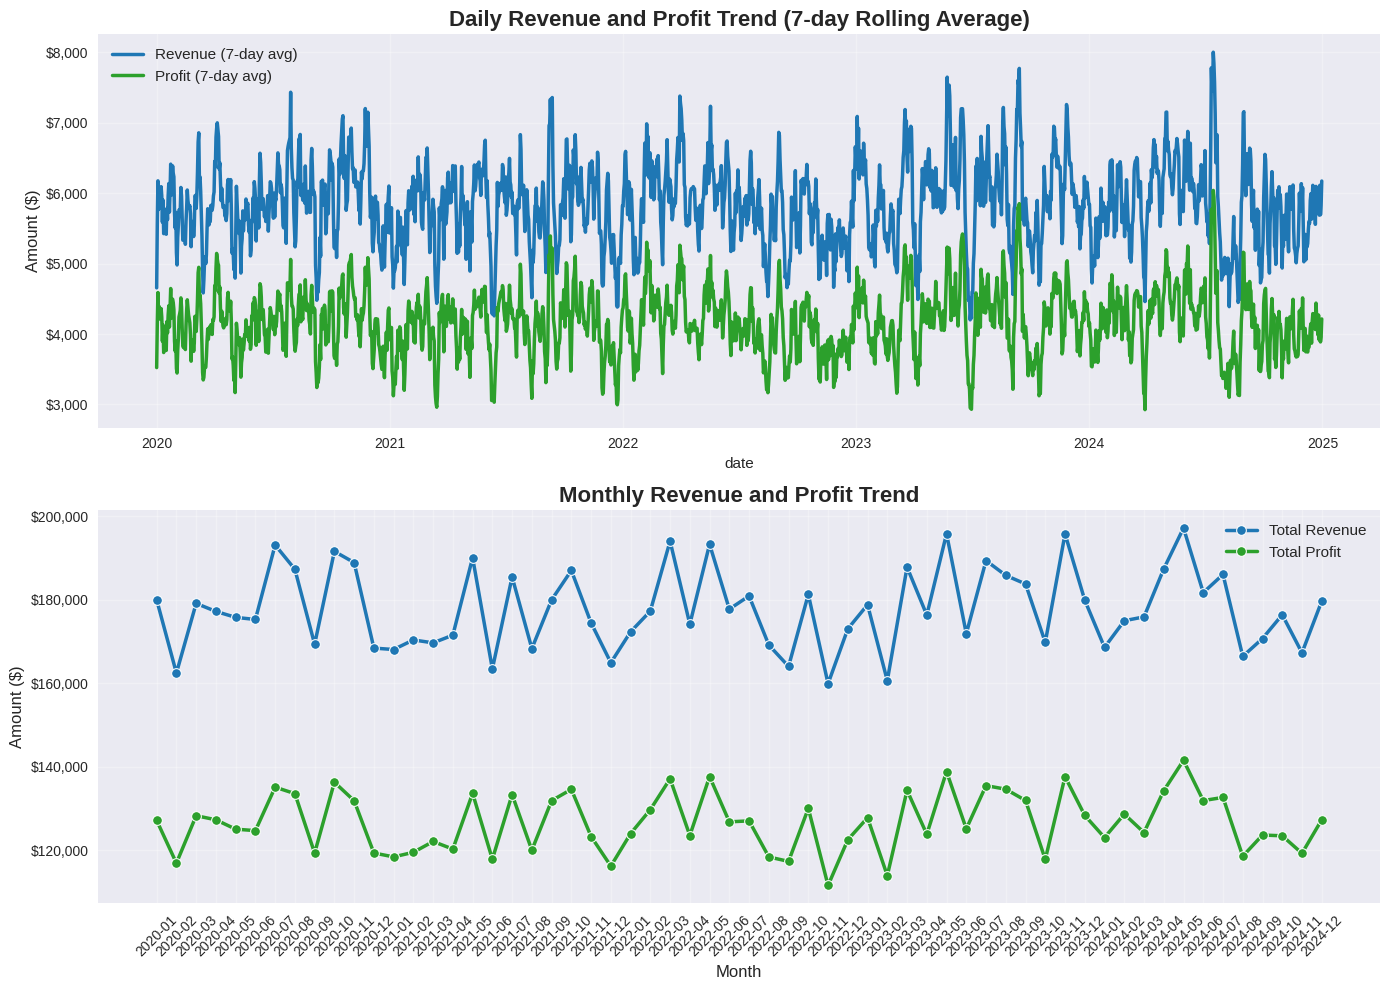

In [7]:
# Sort by date to ensure correct rolling and plotting order
df_clean = df_clean.sort_values('date')


# Aggregate daily sales

daily = df_clean.groupby('date')[['revenue', 'profit']].sum().reset_index()

# Calculate 7-day rolling averages (min_periods=1 avoids NaN at the start)
daily['revenue_rolling'] = daily['revenue'].rolling(window=7, min_periods=1).mean()
daily['profit_rolling'] = daily['profit'].rolling(window=7, min_periods=1).mean()


# Aggregate by month

# Create a proper month-year column for grouping and display
daily['month_year'] = daily['date'].dt.to_period('M')  # Keep as Period for grouping
monthly = daily.groupby('month_year')[['revenue', 'profit']].sum().reset_index()

# Convert to string only for plotting (better tick labels)
monthly['month_year_str'] = monthly['month_year'].astype(str)


# Plotting

plt.style.use('seaborn-v0_8')  # Optional: nicer default style
fig, axs = plt.subplots(2, 1, figsize=(14, 10))

# Top: Smoothed Daily Trends (7-day rolling average)
sns.lineplot(data=daily, x='date', y='revenue_rolling', label='Revenue (7-day avg)', color='tab:blue', linewidth=2.5, ax=axs[0])
sns.lineplot(data=daily, x='date', y='profit_rolling', label='Profit (7-day avg)', color='tab:green', linewidth=2.5, ax=axs[0])

axs[0].set_title("Daily Revenue and Profit Trend (7-day Rolling Average)", fontsize=16, fontweight='bold')
axs[0].set_ylabel("Amount ($)", fontsize=12)
axs[0].legend(fontsize=11)
axs[0].grid(True, alpha=0.3)

# Format y-axis with commas for large numbers
axs[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Bottom: Monthly Trends
sns.lineplot(data=monthly, x='month_year_str', y='revenue', label='Total Revenue', color='tab:blue', marker='o', linewidth=2.5, ax=axs[1])
sns.lineplot(data=monthly, x='month_year_str', y='profit', label='Total Profit', color='tab:green', marker='o', linewidth=2.5, ax=axs[1])

axs[1].set_title("Monthly Revenue and Profit Trend", fontsize=16, fontweight='bold')
axs[1].set_xlabel("Month", fontsize=12)
axs[1].set_ylabel("Amount ($)", fontsize=12)
axs[1].tick_params(axis='x', rotation=45)
axs[1].legend(fontsize=11)
axs[1].grid(True, alpha=0.3)

# Format y-axis with commas
axs[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.tight_layout()
plt.show()

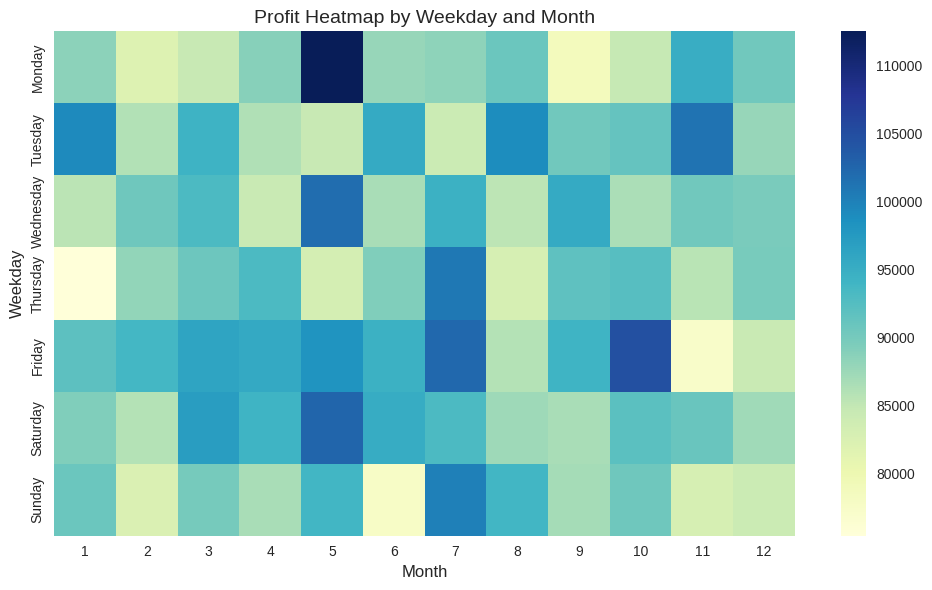

In [8]:
# Define the correct order of weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Ensure 'weekday' is categorical with the specified order
df_clean['weekday'] = pd.Categorical(df_clean['weekday'], categories=weekday_order, ordered=True)

# Group by weekday and month, then create the heatmap
heat = df_clean.groupby(['weekday', 'month'])['profit'].sum().unstack()

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heat, cmap='YlGnBu', annot=False, fmt='.0f')
plt.title("Profit Heatmap by Weekday and Month", fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Weekday', fontsize=12)
plt.tight_layout()
plt.show()

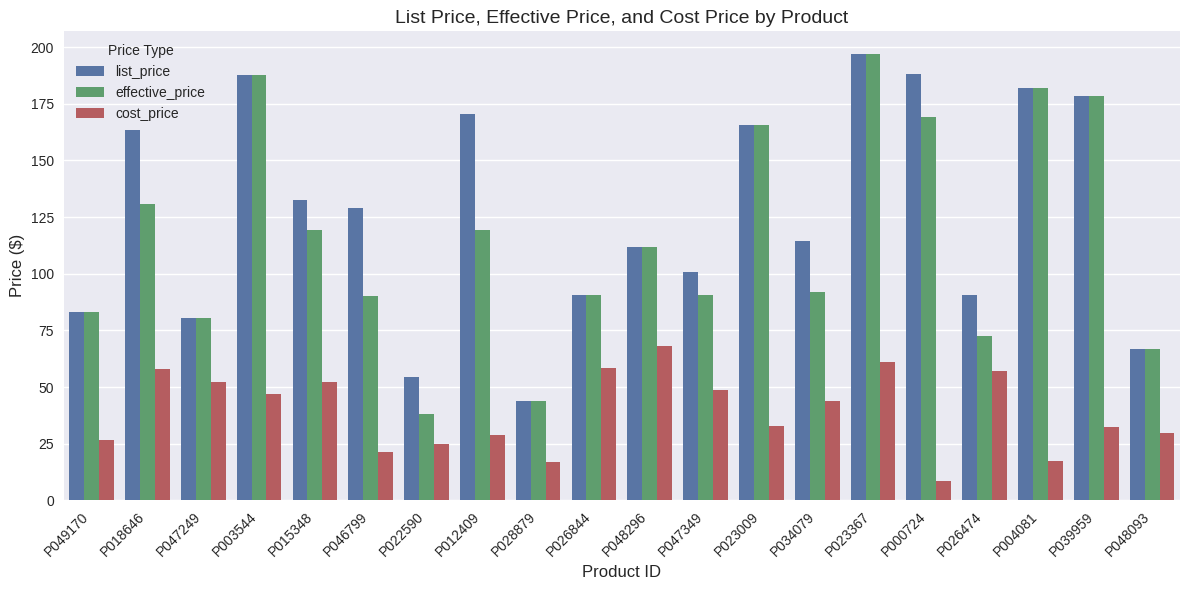

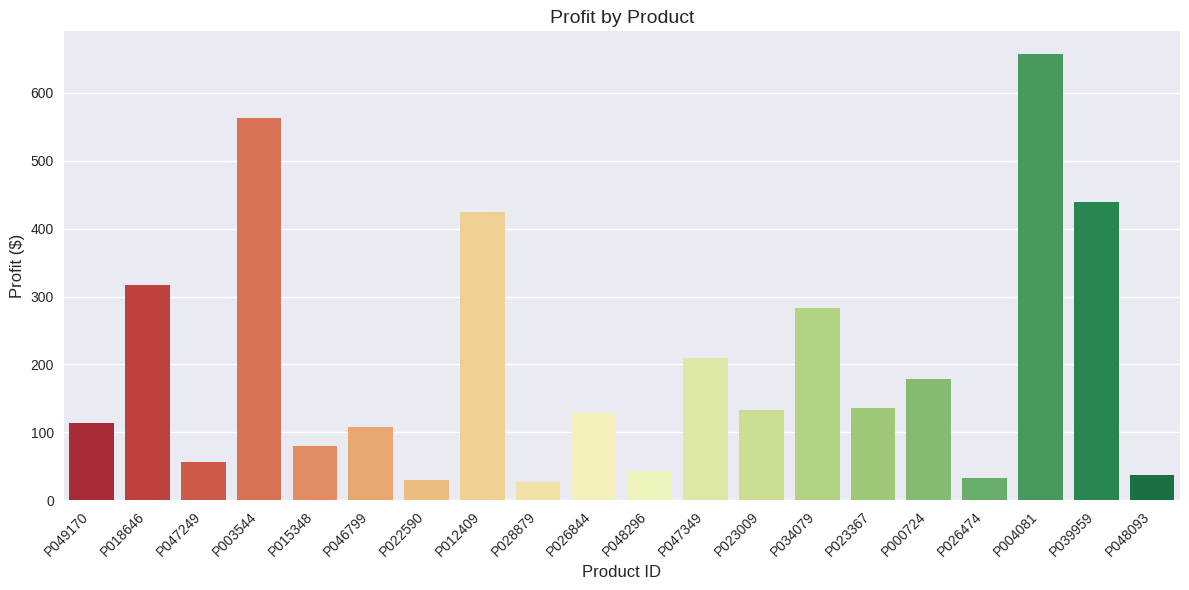

In [9]:
# Calculate effective selling price
df_clean['effective_price'] = df_clean['revenue'] / df_clean['quantity']

# Select a sample of products for clarity (e.g., first 20 unique products)
sample_products = df_clean[['product_id', 'list_price', 'effective_price', 'cost_price', 'profit']].drop_duplicates('product_id').head(20)

# Melt the DataFrame for plotting
melted_df = sample_products.melt(id_vars='product_id', value_vars=['list_price', 'effective_price', 'cost_price'], 
                                 var_name='Price_Type', value_name='Price')

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='product_id', y='Price', hue='Price_Type', data=melted_df)
plt.title('List Price, Effective Price, and Cost Price by Product', fontsize=14)
plt.xlabel('Product ID', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Price Type')
plt.tight_layout()
plt.show()

# Plot profit separately to avoid scale issues
plt.figure(figsize=(12, 6))
sns.barplot(x='product_id', y='profit', data=sample_products, palette='RdYlGn')
plt.title('Profit by Product', fontsize=14)
plt.xlabel('Product ID', fontsize=12)
plt.ylabel('Profit ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

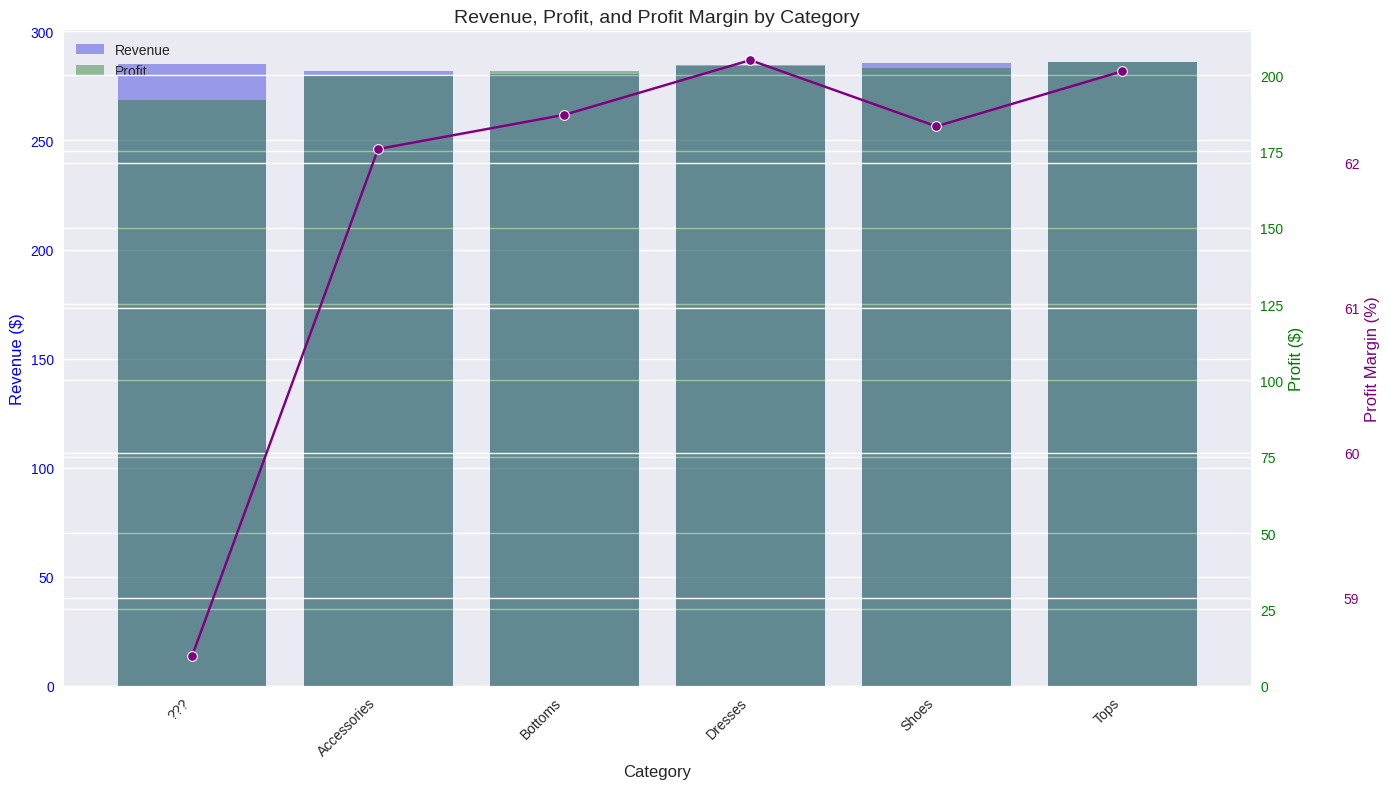

In [10]:
df_clean['profit_margin'] = ((df_clean['list_price'] - df_clean['cost_price']) / df_clean['list_price']) * 100
margin_by_supplier = df_clean.groupby('supplier')['profit_margin'].mean().sort_values()

# Aggregate by category
category_agg = df_clean.groupby('category')[['revenue', 'profit', 'profit_margin']].mean().reset_index()

# Bar plot with dual axes
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot revenue and profit
sns.barplot(data=category_agg, x='category', y='revenue', color='blue', alpha=0.4, label='Revenue', ax=ax1)
ax1.set_ylabel('Revenue ($)', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xlabel('Category', fontsize=12)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Secondary axis for profit
ax2 = ax1.twinx()
sns.barplot(data=category_agg, x='category', y='profit', color='green', alpha=0.4, label='Profit', ax=ax2)
ax2.set_ylabel('Profit ($)', color='green', fontsize=12)
ax2.tick_params(axis='y', labelcolor='green')

# Line plot for profit margin
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Offset third axis
sns.lineplot(data=category_agg, x='category', y='profit_margin', color='purple', marker='o', ax=ax3)
ax3.set_ylabel('Profit Margin (%)', color='purple', fontsize=12)
ax3.tick_params(axis='y', labelcolor='purple')

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax1.legend(lines1 + lines2 + lines3, labels1 + labels2 + labels3, loc='upper left')
plt.title('Revenue, Profit, and Profit Margin by Category', fontsize=14)
plt.tight_layout()
plt.show()

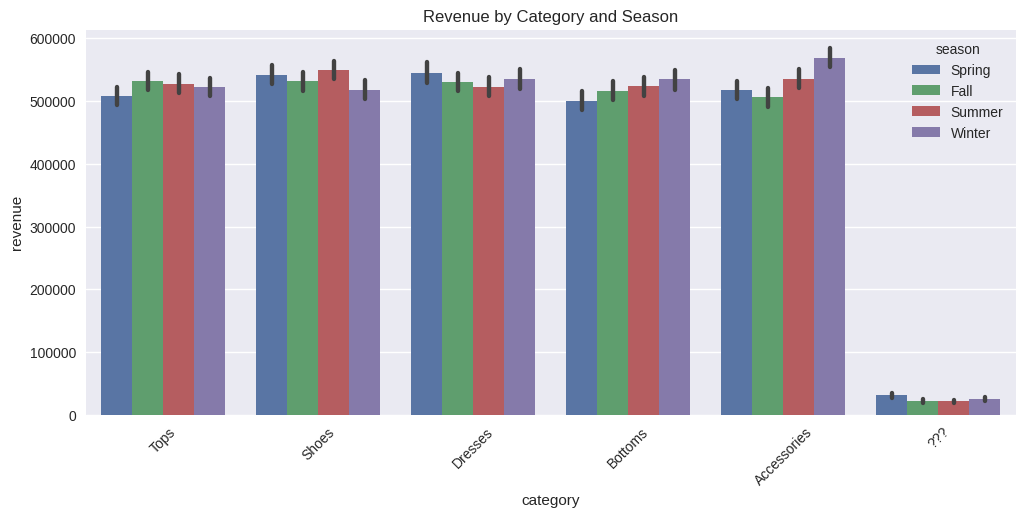

In [11]:
# Revenue by category and season
plt.figure(figsize=(12,5))
sns.barplot(data=df_clean, x='category', y='revenue', hue='season', estimator='sum')
plt.title("Revenue by Category and Season")
plt.xticks(rotation=45)
plt.show()

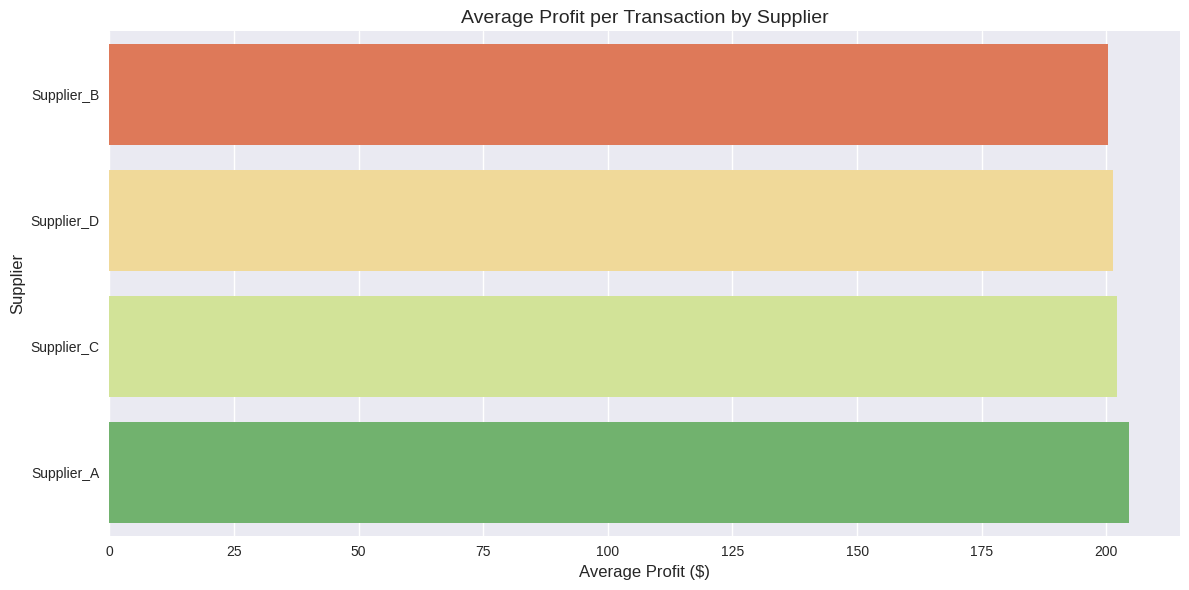

In [12]:
avg_profit_by_supplier = df_clean.groupby('supplier')['profit'].mean().sort_values()
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_profit_by_supplier.values, y=avg_profit_by_supplier.index, palette='RdYlGn')
plt.title('Average Profit per Transaction by Supplier', fontsize=14)
plt.xlabel('Average Profit ($)', fontsize=12)
plt.ylabel('Supplier', fontsize=12)
plt.tight_layout()
plt.show()

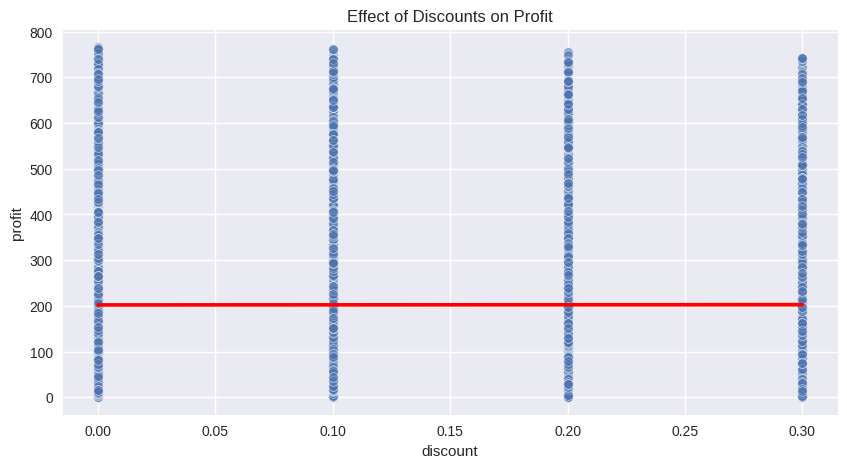

In [13]:
# Discount vs Profit relationship
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_clean, x='discount', y='profit', alpha=0.6)
sns.regplot(data=df_clean, x='discount', y='profit', scatter=False, color='red')
plt.title("Effect of Discounts on Profit")
plt.show()

*Even at higher discounts (e.g., 0.25–0.30), some transactions still yield profits above 200, suggesting that discounts don't always lead to lower profits and may depend on other factors (e.g., quantity sold, product price).*

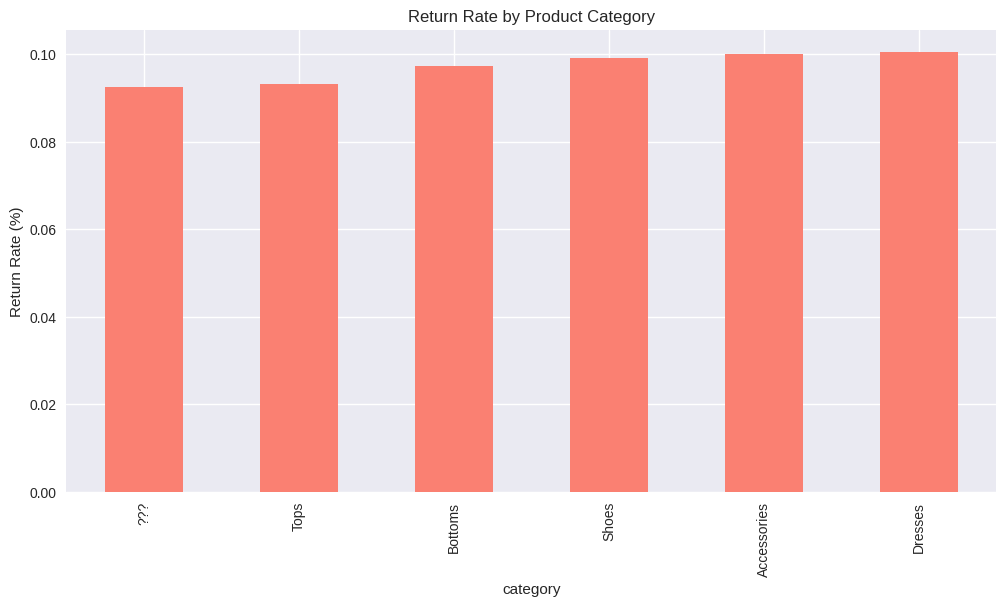

In [14]:
# Return rate by category
returns = df_clean.groupby('category')['returned'].mean().sort_values(ascending=True)
returns.plot(kind='bar', figsize=(12,6), color='salmon')
plt.title("Return Rate by Product Category")
plt.ylabel("Return Rate (%)")
plt.show()

store_size_cat
Small     22496
Medium    14961
NaN         155
Large         0
Name: count, dtype: int64


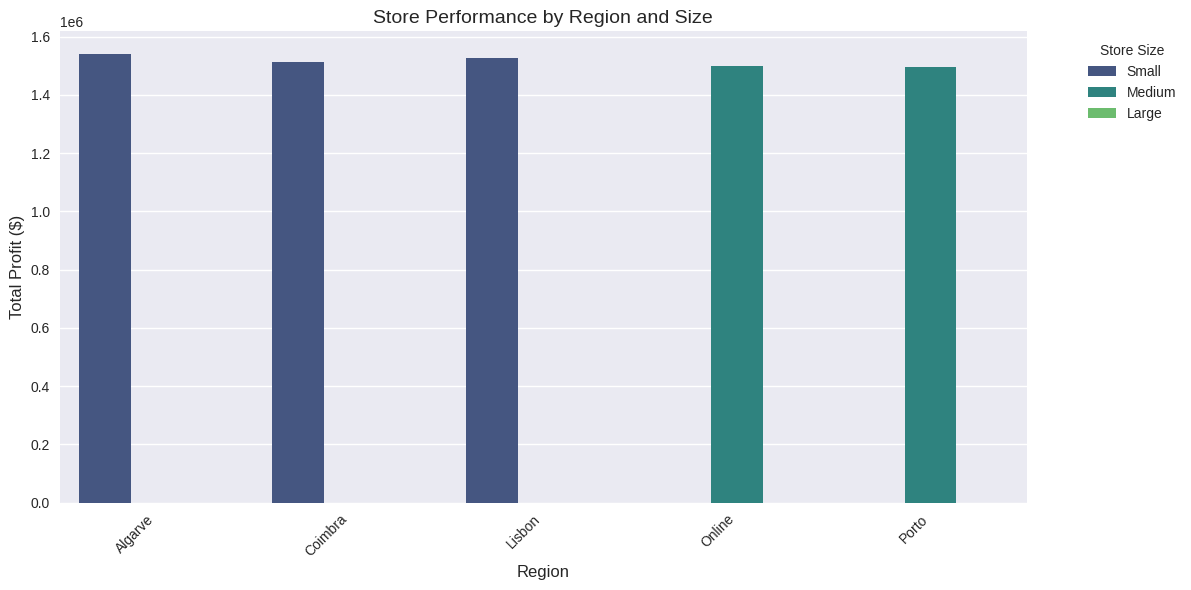

In [15]:
# Bin store sizes into categories
bins = [0, 500, 1000, float('inf')]
labels = ['Small', 'Medium', 'Large']
df_clean['store_size_cat'] = pd.cut(
    df_clean['store_size_m2'], 
    bins=bins, 
    labels=labels, 
    include_lowest=True
)

# Confirm bins worked
print(df_clean['store_size_cat'].value_counts(dropna=False))

# Aggregate and plot
performance_data = df_clean.groupby(['region', 'store_size_cat'], observed=True)['profit'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='profit', hue='store_size_cat', data=performance_data, palette='viridis')

plt.title('Store Performance by Region and Size', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Profit ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Store Size', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


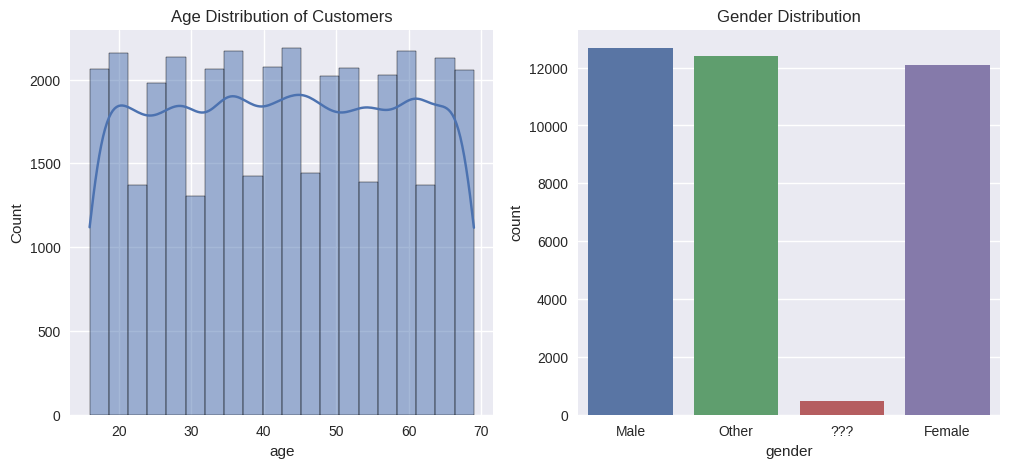

In [16]:
# Customer Demographics
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(df_clean['age'], bins=20, kde=True, ax=ax[0])
sns.countplot(data=df_clean, x='gender', ax=ax[1])
ax[0].set_title("Age Distribution of Customers")
ax[1].set_title("Gender Distribution")
plt.show()

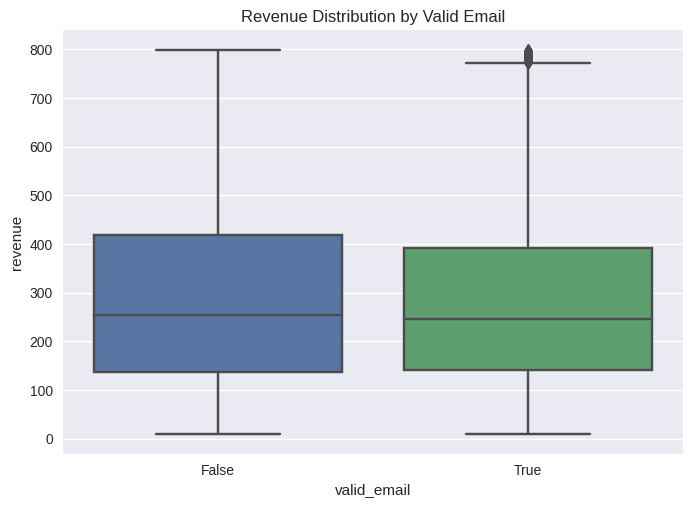

In [17]:
# Email validity vs Revemue
sns.boxplot(data=df_clean, x='valid_email', y='revenue')
plt.title("Revenue Distribution by Valid Email")
plt.show()

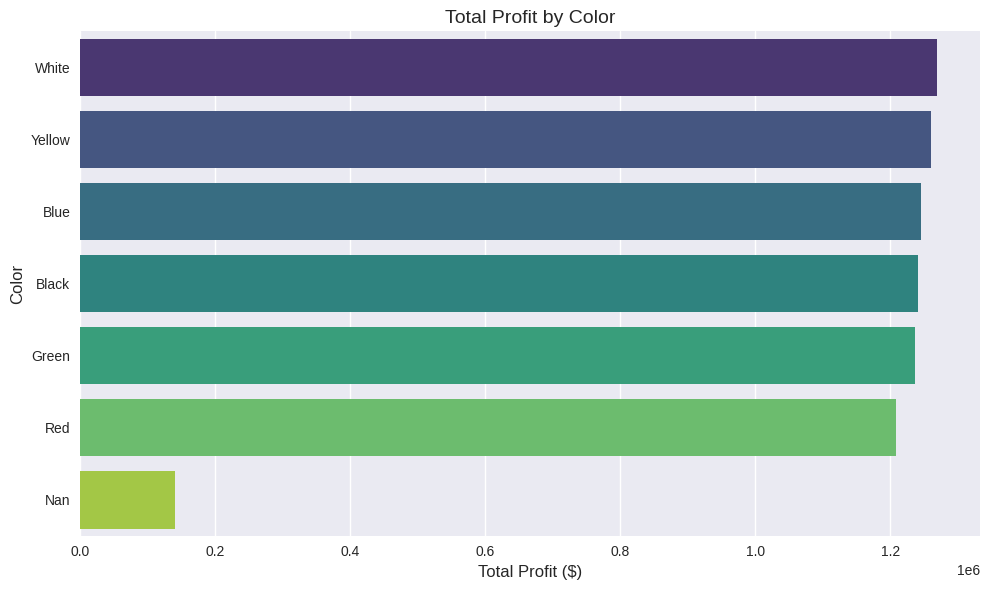

In [18]:
# Group by color and calculate total profit
profit_by_color = df_clean.groupby('color')['profit'].sum().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=profit_by_color.values, y=profit_by_color.index, palette='viridis')
plt.title('Total Profit by Color', fontsize=14)
plt.xlabel('Total Profit ($)', fontsize=12)
plt.ylabel('Color', fontsize=12)
plt.tight_layout()
plt.show()

# Modeling

In [19]:
# Aggregate data to monthly per store

df = df_clean.copy()
#df['date'] = pd.to_datetime(df['date'])
df['year_month'] = df['date'].dt.to_period('M')

store_month = (
    df.groupby(['store_id', 'year_month'])
      .agg({
          'profit': 'sum',
          'revenue': 'sum',
          'quantity': 'sum',
          'discount': 'mean',
          'returned': 'mean',
          'effective_price': 'mean',
          'profit_margin': 'mean'
      })
      .reset_index()
)

store_month['year'] = store_month['year_month'].dt.year
store_month['month'] = store_month['year_month'].dt.month

In [20]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# 1. Fit ETS per store (baseline)
ets_models = {}
store_month['ets_fitted'] = np.nan

for store, g in store_month.groupby('store_id'):
    g = g.sort_values('year_month')
    
    model = ExponentialSmoothing(
        g['profit'],
        trend='add',
        seasonal='add',
        seasonal_periods=12
    ).fit(optimized=True)
    
    ets_models[store] = model
    store_month.loc[g.index, 'ets_fitted'] = model.fittedvalues

# 2. Create residual target for LGBM (This removes:trend and seasonality)
store_month['residual'] = (
    store_month['profit'] - store_month['ets_fitted']
)

# 3. Add lag features on residuals

def add_residual_lags(df):
    df = df.sort_values(['store_id', 'year_month'])
    
    for lag in [1, 2, 3, 6]:
        df[f'resid_lag_{lag}'] = (
            df.groupby('store_id')['residual'].shift(lag)
        )
    return df

store_month = add_residual_lags(store_month)
store_month = store_month.dropna().reset_index(drop=True)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWar

In [21]:
import lightgbm as lgb

# Train LGBM on residuals (time-split)

cutoff = store_month['year_month'].max() - 12

train = store_month[store_month['year_month'] < cutoff]
val   = store_month[store_month['year_month'] >= cutoff]

features = [
    'revenue', 'quantity', 'discount', 'returned',
    'effective_price', 'profit_margin',
    'month',
    'resid_lag_1', 'resid_lag_2', 'resid_lag_3', 'resid_lag_6'
]

X_train, y_train = train[features], train['residual']
X_val, y_val     = val[features], val['residual']

model = lgb.LGBMRegressor(
    n_estimators=1500,
    learning_rate=0.03,
    num_leaves=48,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    verbosity=-1
)

model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric='rmse',
    callbacks=[lgb.early_stopping(100)]
)


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[377]	valid_0's rmse: 2047.65	valid_0's l2: 4.19289e+06


LGBMRegressor(colsample_bytree=0.8, learning_rate=0.03, n_estimators=1500,
              num_leaves=48, random_state=42, subsample=0.8, verbosity=-1)

In [22]:
# Forecast next 24 months (hybrid)

# ETS baseline
future_ets = {}

for store, model_ets in ets_models.items():
    future_ets[store] = model_ets.forecast(24)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa

In [23]:
# Recursive residual forecast 
def forecast_residuals(store_df, model, steps=24):
    preds = []
    current = store_df.sort_values('year_month').iloc[-1:].copy()

    for _ in range(steps):
        X = current[features]
        resid_pred = model.predict(X)[0]
        preds.append(resid_pred)

        # roll lags
        current['resid_lag_6'] = current['resid_lag_5'] if 'resid_lag_5' in current else current['resid_lag_6']
        current['resid_lag_3'] = current['resid_lag_2']
        current['resid_lag_2'] = current['resid_lag_1']
        current['resid_lag_1'] = resid_pred

        current['month'] = (current['month'] % 12) + 1

    return np.array(preds)

# Combine
final_forecasts = []

for store in store_month['store_id'].unique():
    ets_part = future_ets[store].values
    store_hist = store_month[store_month['store_id'] == store]
    resid_part = forecast_residuals(store_hist, model)

    total = ets_part + resid_part

    final_forecasts.append(
        pd.DataFrame({
            'store_id': store,
            'horizon': np.arange(1, 25),
            'predicted_profit': total
        })
    )

forecast_df = pd.concat(final_forecasts)


In [24]:
forecast_df.head()

,store_id,horizon,predicted_profit
0,S001,1,20812.404538
1,S001,2,21889.087691
2,S001,3,22216.800864
3,S001,4,24059.268810
4,S001,5,21050.415787
